
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [2]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [3]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [5]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [6]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [7]:
# 第三步：編譯, 
# model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [9]:
# 第五步：訓練, 修正 model 參數
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
#batch_size=128
#epochs=20
batch_size= [512,1024]
epochs = [10,20]


In [10]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


batch_size= [512,1024]
epochs = [10,20]

history_assembly =[]
for batch in batch_size:
    for epoch in epochs:
        print(f'\n ecochs= {epoch} , batch_size= {batch} \n')
        history = model.fit(X_train,Y_train,batch_size = batch, epochs=epoch, shuffle=True,verbose=2,validation_split=0.3 )
        history_assembly.append(history)
        history = []


 ecochs= 10 , batch_size= 512 

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 4s - loss: 2.8802 - acc: 0.8199 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 6/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 7/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 8/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 9/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 10/10
 - 4s - loss: 2.8895 - acc: 0.8197 - val_loss: 2.8835 - val_acc: 0.8201

 ecochs= 20 , batch_size= 512 

Train

In [ ]:
#    第六步：輸出
 
#print ( " test set " )
#scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
#print ( "" )
 
#print ( " The test loss is %f ", scores)
#result = model.predict(X_test,batch_size=200,verbose= 0)

#result_max = numpy.argmax(result, axis = 1 )
#test_max = numpy.argmax(Y_test, axis = 1 )

#result_bool = numpy.equal(result_max, test_max)
#true_num = numpy.sum(result_bool)
#print ( "" )
#print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

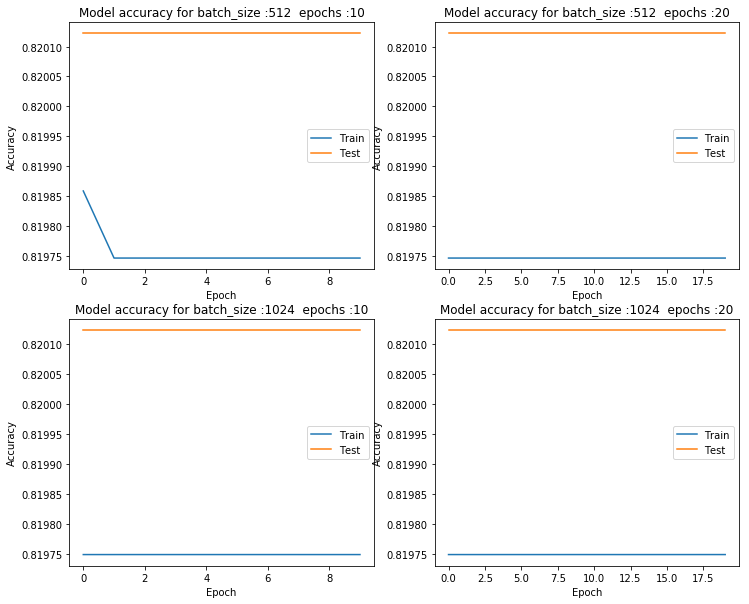

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize=(12,10))
k=0
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,k+1)
        plt.plot(history_assembly[k].history['acc'])
        plt.plot(history_assembly[k].history['val_acc'])
        plt.title('Model accuracy for ' + 'batch_size :'+ str(batch_size[i]) +'  epochs :' + str(epochs[j]))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        k += 1
   
plt.show()

## 作業二 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [17]:
def plot_output(history):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
         
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [18]:
def fit_model(model,opt):
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train,batch_size = 512, epochs=20, shuffle=True,verbose=2,validation_split=0.3 )
    return history

In [19]:
model = Sequential()

model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 1.1344 - acc: 0.9126 - val_loss: 0.8296 - val_acc: 0.9309
Epoch 2/20
 - 2s - loss: 0.2547 - acc: 0.9741 - val_loss: 0.5319 - val_acc: 0.9522
Epoch 3/20
 - 2s - loss: 0.1616 - acc: 0.9819 - val_loss: 0.6601 - val_acc: 0.9459
Epoch 4/20
 - 2s - loss: 0.1296 - acc: 0.9852 - val_loss: 0.1361 - val_acc: 0.9839
Epoch 5/20
 - 2s - loss: 0.0858 - acc: 0.9893 - val_loss: 0.1275 - val_acc: 0.9845
Epoch 6/20
 - 2s - loss: 0.0708 - acc: 0.9907 - val_loss: 0.1193 - val_acc: 0.9853
Epoch 7/20
 - 2s - loss: 0.0569 - acc: 0.9923 - val_loss: 0.1754 - val_acc: 0.9789
Epoch 8/20
 - 2s - loss: 0.0505 - acc: 0.9930 - val_loss: 0.1499 - val_acc: 0.9814
Epoch 9/20
 - 2s - loss: 0.0423 - acc: 0.9942 - val_loss: 0.1031 - val_acc: 0.9863
Epoch 10/20
 - 2s - loss: 0.0355 - acc: 0.9953 - val_loss: 0.1043 - val_acc: 0.9861
Epoch 11/20
 - 2s - loss: 0.0316 - acc: 0.9960 - val_loss: 0.1021 - val_acc: 0.9864
Epoch 12/20
 - 2s - loss: 0.0285 - 

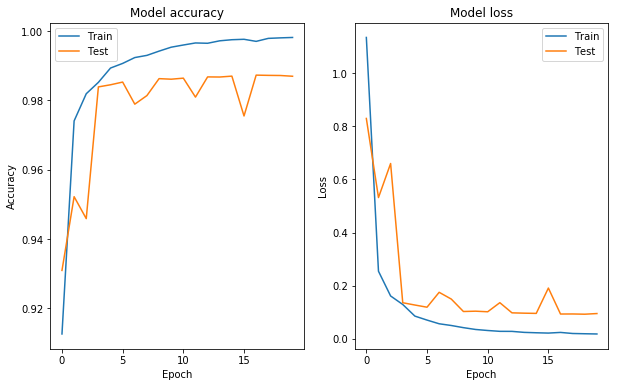

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 0.4173 - acc: 0.9645 - val_loss: 0.3426 - val_acc: 0.9670
Epoch 2/20
 - 3s - loss: 0.2459 - acc: 0.9726 - val_loss: 0.2169 - val_acc: 0.9729
Epoch 3/20
 - 3s - loss: 0.1871 - acc: 0.9780 - val_loss: 0.1932 - val_acc: 0.9770
Epoch 4/20
 - 3s - loss: 0.1713 - acc: 0.9823 - val_loss: 0.1888 - val_acc: 0.9784
Epoch 5/20
 - 3s - loss: 0.1654 - acc: 0.9845 - val_loss: 0.1852 - val_acc: 0.9798
Epoch 6/20
 - 3s - loss: 0.1618 - acc: 0.9860 - val_loss: 0.1836 - val_acc: 0.9807
Epoch 7/20
 - 3s - loss: 0.1593 - acc: 0.9876 - val_loss: 0.1821 - val_acc: 0.9814
Epoch 8/20
 - 3s - loss: 0.1588 - acc: 0.9879 - val_loss: 0.1815 - val_acc: 0.9817
Epoch 9/20
 - 3s - loss: 0.1576 - acc: 0.9890 - val_loss: 0.1816 - val_acc: 0.9820
Epoch 10/20
 - 3s - loss: 0.0404 - acc: 0.9934 - val_loss: 0.0410 - val_acc: 0.9908
Epoch 11/20
 - 3s - loss: 0.0123 - acc: 0.9964 - val_loss: 0.0359 - val_acc: 0.9916
Epoch 12/20
 - 3s - loss: 0.0083 - 

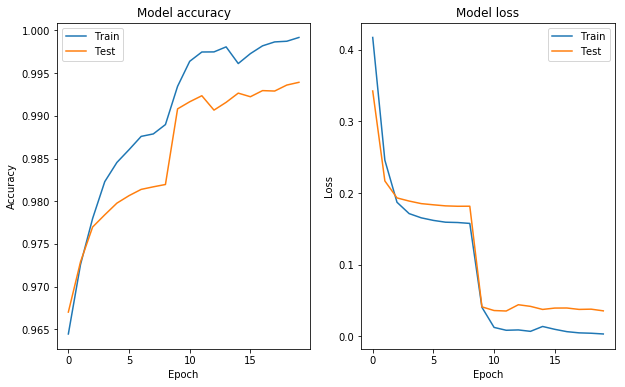

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 0.0333 - acc: 0.9944 - val_loss: 0.0539 - val_acc: 0.9915
Epoch 2/20
 - 3s - loss: 0.0155 - acc: 0.9967 - val_loss: 0.0484 - val_acc: 0.9924
Epoch 3/20
 - 3s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0483 - val_acc: 0.9925
Epoch 4/20
 - 3s - loss: 0.0141 - acc: 0.9971 - val_loss: 0.0439 - val_acc: 0.9930
Epoch 5/20
 - 3s - loss: 0.0136 - acc: 0.9971 - val_loss: 0.0388 - val_acc: 0.9938
Epoch 6/20
 - 3s - loss: 0.0104 - acc: 0.9979 - val_loss: 0.0664 - val_acc: 0.9898
Epoch 7/20
 - 3s - loss: 0.0123 - acc: 0.9976 - val_loss: 0.0674 - val_acc: 0.9897
Epoch 8/20
 - 3s - loss: 0.0107 - acc: 0.9979 - val_loss: 0.0488 - val_acc: 0.9934
Epoch 9/20
 - 3s - loss: 0.0100 - acc: 0.9981 - val_loss: 0.0478 - val_acc: 0.9939
Epoch 10/20
 - 3s - loss: 0.0102 - acc: 0.9981 - val_loss: 0.0439 - val_acc: 0.9940
Epoch 11/20
 - 3s - loss: 0.0098 - acc: 0.9982 - val_loss: 0.0469 - val_acc: 0.9942
Epoch 12/20
 - 3s - loss: 0.0092 - 

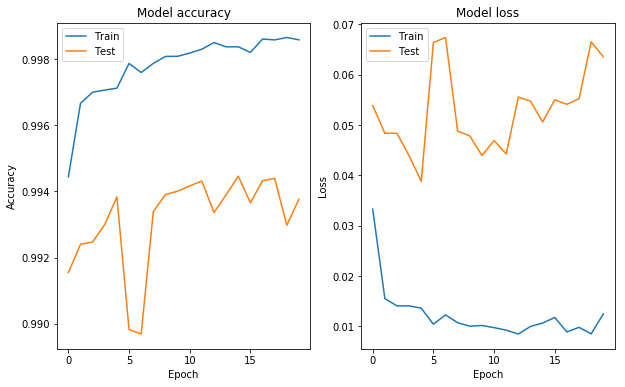

In [20]:
opts=['SGD','Adam','Rmsprop']

for opt in opts:
    history = fit_model(model,opt)
    plot_output(history)